<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/EDA_main_project/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import necessary libraries
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings

In [3]:
# Read the CSV file into a DataFrame
data = pd.read_csv("/content/sample_data/all_season_details.csv", low_memory=False)

In [4]:
#Make copy of dataframe
ipl_df=data.copy()

In [5]:
#shows first 5 rows
ipl_df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [6]:
# gives data type and non-null values
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [7]:
# dropped unneccessary cols
ipl_df = ipl_df.drop(['comment_id', 'shortText', 'text', 'preText', 'postText'], axis=1)

In [8]:
# gives number of null values in each cols
ipl_df.isnull().sum()

,0
season,483
match_id,0
match_name,0
home_team,0
away_team,0
current_innings,0
innings_id,0
over,0
ball,0
runs,0


In [9]:
# Identify match_ids with missing season values that couldn't be filled
missing_season_match_ids = ipl_df[ipl_df['season'].isnull()]['match_id'].unique()
missing_season_match_ids

array([1359496, 1359538])

In [10]:
# fill match_id 1359496, 1359538 with season 2023
ipl_df.loc[ipl_df['match_id'] == 1359496, 'season'] = 2023
ipl_df.loc[ipl_df['match_id'] == 1359538, 'season'] = 2023

# Type Conversion

In [11]:
ipl_df['season'] = ipl_df['season'].astype(int)  # object to int
ipl_df['isWide'] = ipl_df['isWide'].astype(bool)  # object to bool
ipl_df['isNoball'] = ipl_df['isNoball'].astype(bool) # object to bool
ipl_df['batsman1_runs'] = ipl_df['batsman1_runs'].astype(int)  # float to int
ipl_df['batsman1_balls'] = ipl_df['batsman1_balls'].astype(int)
ipl_df['bowler1_runs'] = ipl_df['bowler1_runs'].astype(int)
ipl_df['bowler1_wkts'] = ipl_df['bowler1_wkts'].astype(int)
ipl_df['bowler1_maidens'] = ipl_df['bowler1_maidens'].astype(int)

In [12]:
# make sure all fields has converted to proper dtype
ipl_df.dtypes

,0
season,int64
match_id,int64
match_name,object
home_team,object
away_team,object
current_innings,object
innings_id,int64
over,int64
ball,int64
runs,int64


In [13]:
#unique team names
unique_innings=ipl_df['current_innings'].unique()
print(f"IPL teams: {unique_innings}")

IPL teams: ['CSK' 'GT' 'PBKS' 'KKR' 'LSG' 'DC' 'RR' 'SRH' 'MI' 'RCB' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']


In [14]:
# Replace 'KXIP' with 'PBKS' in specified columns
ipl_df[['home_team', 'away_team', 'current_innings']] = ipl_df[['home_team', 'away_team', 'current_innings']].replace('KXIP', 'PBKS')

In [15]:
def get_team_name(abbreviation):
    team_mapping = {
        'CSK': 'Chennai Super Kings',
        'GT': 'Gujarat Titans',
        'PBKS': 'Punjab Kings',
        'KKR': 'Kolkata Knight Riders',
        'LSG': 'Lucknow Super Giants',
        'DC': 'Delhi Capitals',
        'RR': 'Rajasthan Royals',
        'SRH': 'Sunrisers Hyderabad',
        'MI': 'Mumbai Indians',
        'RCB': 'Royal Challengers Bangalore',
        'RPS': 'Rising Pune Supergiant',
        'GL': 'Gujarat Lions',
        'PWI': 'Pune Warriors India',
        'Kochi': 'Kochi Tuskers Kerala'
    }
    return team_mapping.get(abbreviation, "Unknown Team")


# 1. Runs distribution

Total runs: 319657


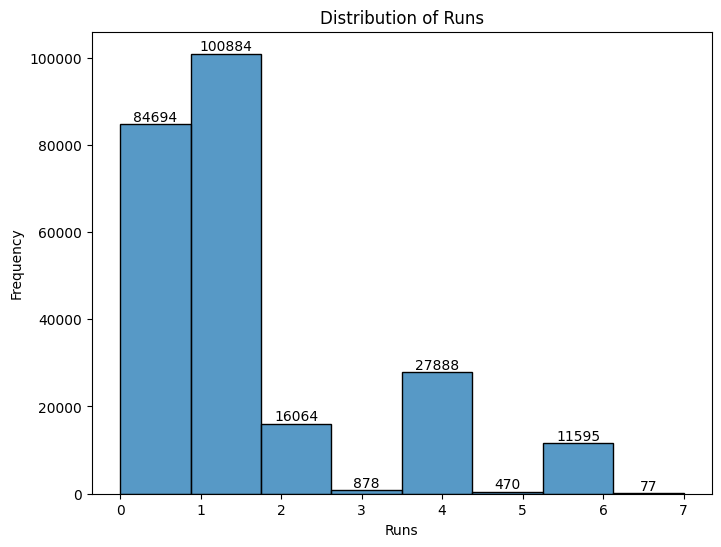

In [16]:

plt.figure(figsize=(8, 6))
ax = sns.histplot(ipl_df['runs'], bins=8)
print(f"Total runs: {ipl_df['runs'].sum()}")


plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height
    ax.text(x, y, int(height), ha='center', va='bottom')

plt.show()


# 2. Frequency of Different Types of Deliveries (Boundaries, Wides, No-balls)

Total balls: 319657



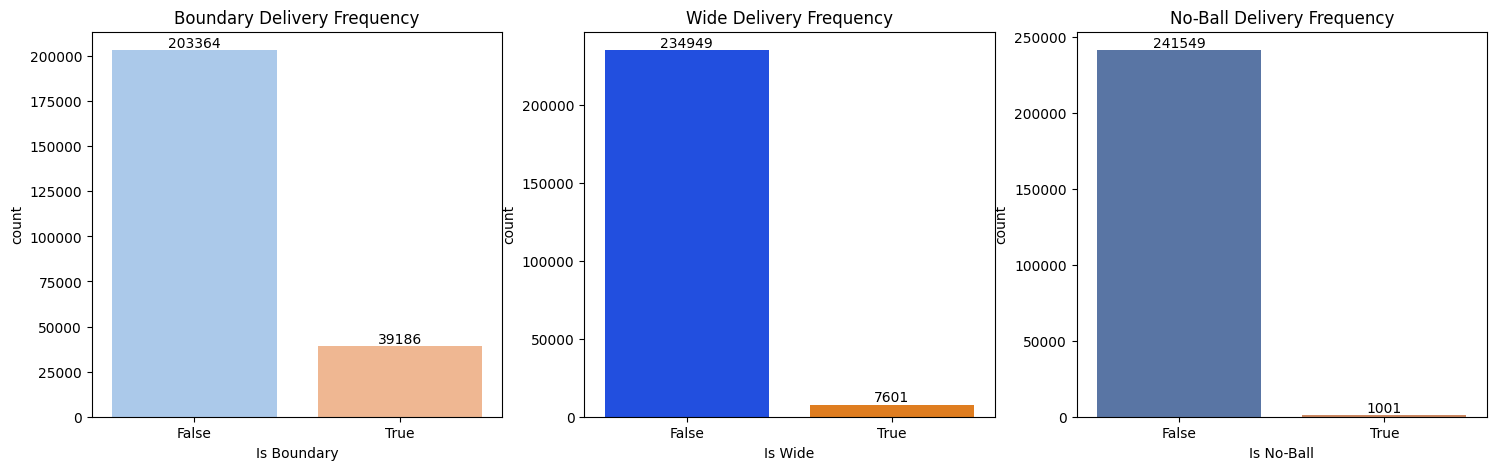

In [17]:

# Store boundary count data
warnings.filterwarnings("ignore")
boundary_count = ipl_df['isBoundary'].value_counts()
wide_count = ipl_df['isWide'].value_counts()
noball_count = ipl_df['isNoball'].value_counts()
#print(f"Total balls: {ipl_df['runs'].sum()}", f"Boundary Count: {boundary_count}"\n, f"Wide Count: {wide_count}" \n, f"No-Ball Count: {noball_count}")
print(f"Total balls: {ipl_df['runs'].sum()}\n")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='isBoundary', data=ipl_df, ax=ax[0], palette='pastel', legend=False)
ax[0].set_title('Boundary Delivery Frequency')
ax[0].set_xlabel('Is Boundary')
# Add observations on top of bars
for patch in ax[0].patches:
    ax[0].text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
               int(patch.get_height()), ha='center', va='bottom')

sns.countplot(x='isWide', data=ipl_df, ax=ax[1], palette='bright', legend=False)
ax[1].set_title('Wide Delivery Frequency')
ax[1].set_xlabel('Is Wide')

for patch in ax[1].patches:
    ax[1].text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
               int(patch.get_height()), ha='center', va='bottom')

sns.countplot(x='isNoball', data=ipl_df, ax=ax[2], palette='deep', legend=False)
ax[2].set_title('No-Ball Delivery Frequency')
ax[2].set_xlabel('Is No-Ball')

for patch in ax[2].patches:
    ax[2].text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
               int(patch.get_height()), ha='center', va='bottom')

plt.show()

# 3. Top 10 Bowlers by number of Wides

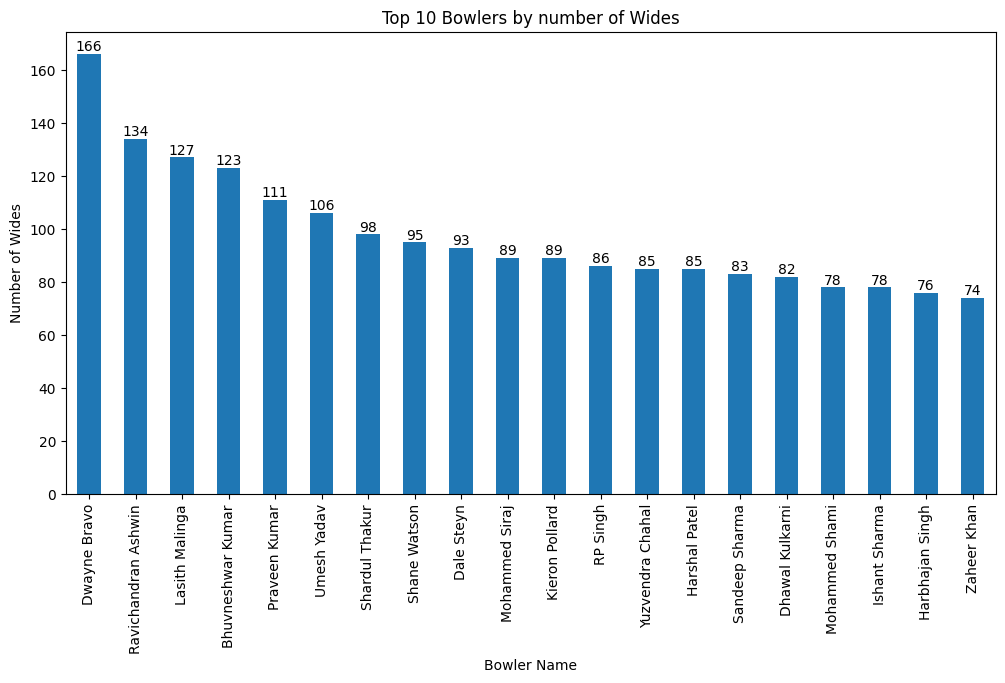

In [18]:
#Filter data for 'isWide' == True before groupby and Use count to get the number of wide balls per bowler
top_bowlers = ipl_df[ipl_df['isWide'] == True].groupby('bowler1_name')['isWide'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax=top_bowlers.plot(kind='bar')
for i, v in enumerate(top_bowlers):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title('Top 10 Bowlers by number of Wides')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Wides')
#plt.xticks(rotation=45)
plt.show()
#


# 4. Top Batsmen by Runs

Top 10 Batter:     Runs 
Virat Kohli       7513
Shikhar Dhawan    6948
David Warner      6722
Rohit Sharma      6414
Suresh Raina      5762
AB de Villiers    5312
Chris Gayle       5296
MS Dhoni          5245
Robin Uthappa     5237
Dinesh Karthik    4692


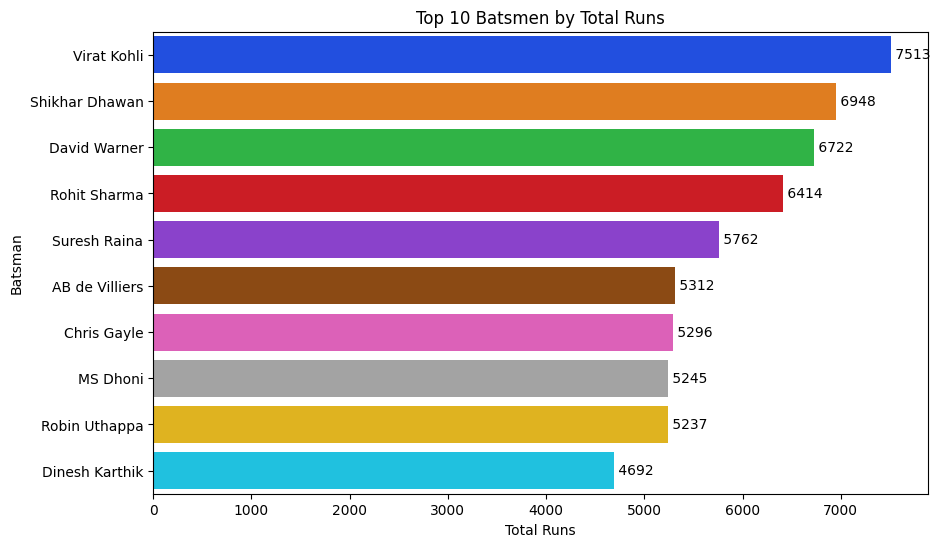

In [19]:

top_batsmen = ipl_df.groupby('batsman1_name')['runs'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 Batter:     Runs \n{top_batsmen.to_string(header=False)}")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='bright', legend=False)
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
for index, value in enumerate(top_batsmen.values):
    plt.text(value, index, f" {value}", va='center')
plt.show()

# 5. Runs by Top Batsmen Across Different Overs

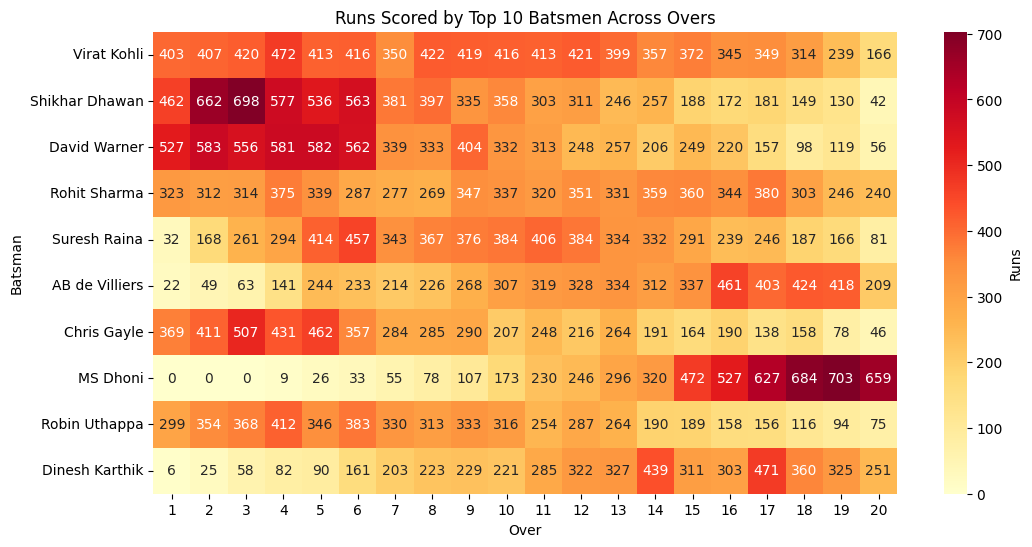

In [20]:
batsman_over_runs = ipl_df.groupby(['batsman1_name', 'over'])['runs'].sum().unstack(fill_value=0)

# Filter to top batsmen (adjust the number as needed)
top_batsmen = batsman_over_runs.sum(axis=1).nlargest(10).index
batsman_over_runs = batsman_over_runs.loc[top_batsmen]

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(batsman_over_runs, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={'label': 'Runs'})
plt.title('Runs Scored by Top 10 Batsmen Across Overs')
plt.xlabel('Over')
plt.ylabel('Batsman')
plt.show()

# 6. Top 10 Partnership Between Bowlers Vs Batters based on Wicket Count

	 Bowler 	  Batter runs
        Sunil Narine  Rohit Sharma 8
        Amit Mishra  Rohit Sharma 7
  Bhuvneshwar Kumar Parthiv Patel 7
       Mohit Sharma Ambati Rayudu 7
       Pragyan Ojha      MS Dhoni 7
Ravichandran Ashwin Robin Uthappa 7
     Sandeep Sharma   Virat Kohli 7
        Zaheer Khan      MS Dhoni 7
        Amit Mishra  Shane Watson 6
       Ashish Nehra   Virat Kohli 6


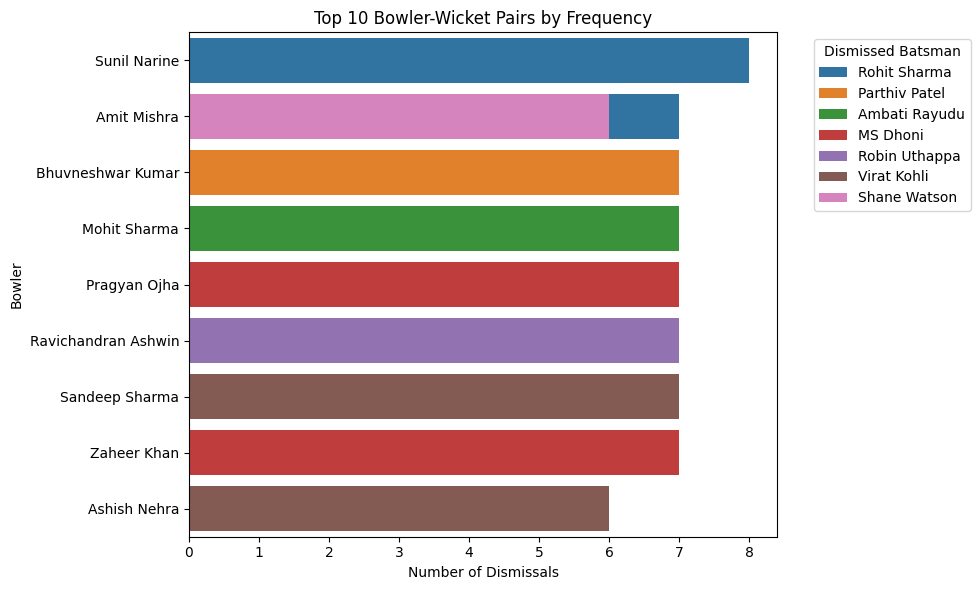

In [21]:
# Group by bowler and count wickets
top_bowlers_wickets = ipl_df.groupby('bowler1_name')['wkt_batsman_name'].value_counts().nlargest(10)

# Convert the series to a DataFrame with reset_index()
top_bowlers_wickets = top_bowlers_wickets.reset_index(name='count')
print(f"\t Bowler \t  Batter runs\n {top_bowlers_wickets.to_string(index=False, header=False)}")

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='bowler1_name', hue='wkt_batsman_name', data=top_bowlers_wickets, dodge=False, palette='tab10')
plt.title('Top 10 Bowler-Wicket Pairs by Frequency')
plt.xlabel('Number of Dismissals')
plt.ylabel('Bowler')

plt.legend(title='Dismissed Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Wicket Fall Distribution Across Overs by Top 15 Bowlers

Total wickets: 11880


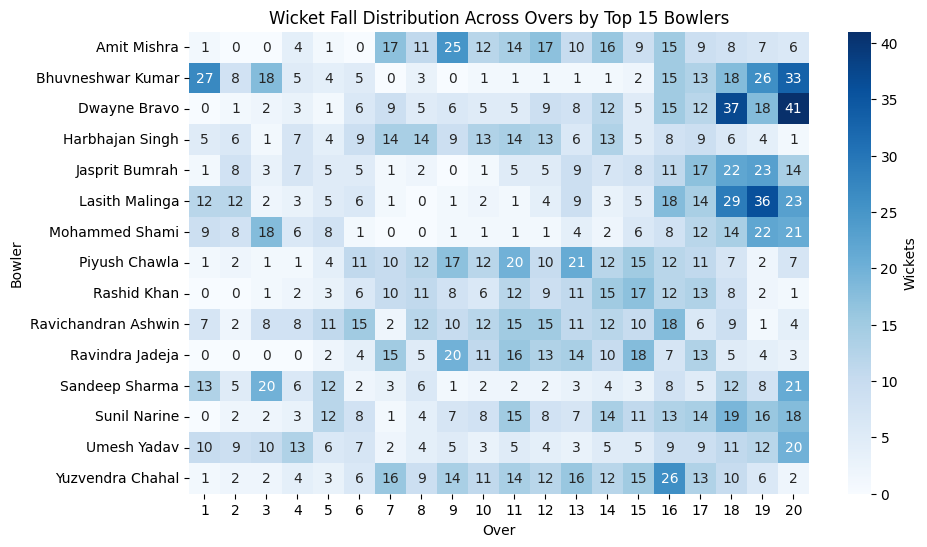

In [22]:
# Identify the top 15 bowlers with the most wickets
top_bowlers_wickets = ipl_df.groupby('bowler1_name')['wkt_batsman_name'].count().nlargest(15)
print(f"Total wickets: {ipl_df['wkt_batsman_name'].count()}")
# List of top 15 bowlers
top_bowlers = top_bowlers_wickets.index.tolist()

top_bowlers_data = ipl_df[ipl_df['bowler1_name'].isin(top_bowlers)]

# Group by bowler name and over to count the wickets per over for each bowler
wickets_per_over = top_bowlers_data[top_bowlers_data['wkt_batsman_name'].notnull()]
wickets_per_over = wickets_per_over.groupby(['bowler1_name', 'over'])['wkt_batsman_name'].count().reset_index(name='wicket_count')

# Create a pivot table for heatmap
wickets_pivot = wickets_per_over.pivot(index='bowler1_name', columns='over', values='wicket_count').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(wickets_pivot, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Wickets'})
plt.title('Wicket Fall Distribution Across Overs by Top 15 Bowlers')
plt.xlabel('Over')
plt.ylabel('Bowler')

plt.show()


# 8. Maximum number of matches played by batter

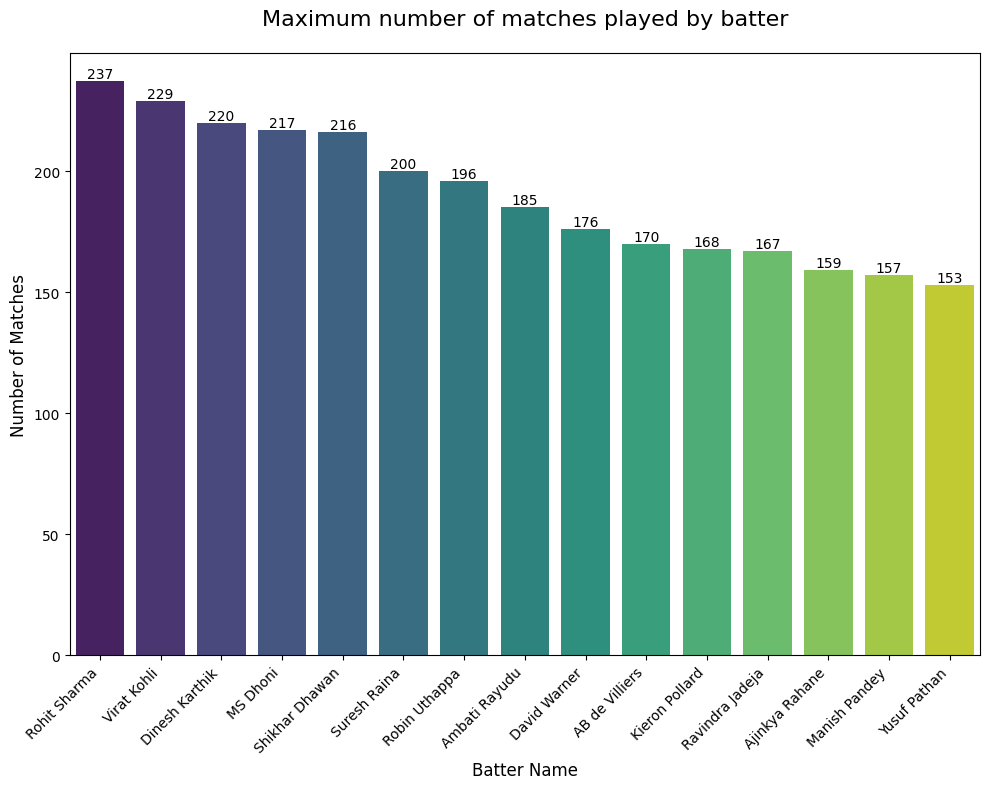


Detailed Analysis of Player Participation:
1. Top player Rohit Sharma has played 237 matches
2. Average matches among top 15 players: 190.0
3. Median matches among top 15 players: 185.0

Experience Distribution:
Minimum matches: 153
Maximum matches: 237
Standard deviation: 28.3

Gaps Between Players:
Rohit Sharma has played 8 more matches than Virat Kohli
Virat Kohli has played 9 more matches than Dinesh Karthik
Shikhar Dhawan has played 16 more matches than Suresh Raina
Robin Uthappa has played 11 more matches than Ambati Rayudu
Ambati Rayudu has played 9 more matches than David Warner
David Warner has played 6 more matches than AB de Villiers
Ravindra Jadeja has played 8 more matches than Ajinkya Rahane

Quartile Analysis:
25th percentile: 167 matches
50th percentile: 185 matches
75th percentile: 216 matches


In [23]:
# Calculate the number of unique matches each batsman has played
matches_played = ipl_df.groupby('batsman1_id')['match_id'].nunique().reset_index().nlargest(15, 'match_id')
matches_played = matches_played.rename(columns={'match_id': 'matches_played'})

most_matches = pd.merge(matches_played,
                       ipl_df[['batsman1_id', 'batsman1_name']],
                       on='batsman1_id',
                       how='left').drop_duplicates().head(15)

plt.figure(figsize=(10, 8))

sns.barplot(data=most_matches,
            x='batsman1_name',
            y='matches_played',
            palette='viridis')

plt.title('Maximum number of matches played by batter', pad=20, fontsize=16)
plt.xlabel('Batter Name', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(most_matches['matches_played']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# additional statistics for insights
total_matches = ipl_df['match_id'].nunique()
avg_matches = most_matches['matches_played'].mean()
median_matches = most_matches['matches_played'].median()

print("\nDetailed Analysis of Player Participation:")
print("==========================================")
print(f"1. Top player {most_matches.iloc[0]['batsman1_name']} has played {int(most_matches.iloc[0]['matches_played'])} matches")
print(f"2. Average matches among top 15 players: {avg_matches:.1f}")
print(f"3. Median matches among top 15 players: {median_matches:.1f}")

experience_stats = most_matches['matches_played'].describe()
print("\nExperience Distribution:")
print("======================")
print(f"Minimum matches: {int(experience_stats['min'])}")
print(f"Maximum matches: {int(experience_stats['max'])}")
print(f"Standard deviation: {experience_stats['std']:.1f}")

matches_diff = []
for i in range(len(most_matches)-1):
    diff = most_matches.iloc[i]['matches_played'] - most_matches.iloc[i+1]['matches_played']
    matches_diff.append((most_matches.iloc[i]['batsman1_name'],
                        most_matches.iloc[i+1]['batsman1_name'],
                        diff))

print("\nGaps Between Players:")
print("===========================")
for player1, player2, diff in matches_diff:
    if diff > 5:  # Only show significant gaps
        print(f"{player1} has played {int(diff)} more matches than {player2}")

quartiles = most_matches['matches_played'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Analysis:")
print("================")
print(f"25th percentile: {int(quartiles[0.25])} matches")
print(f"50th percentile: {int(quartiles[0.5])} matches")
print(f"75th percentile: {int(quartiles[0.75])} matches")


# 9. Most 4's and 6's


<Figure size 1200x800 with 0 Axes>

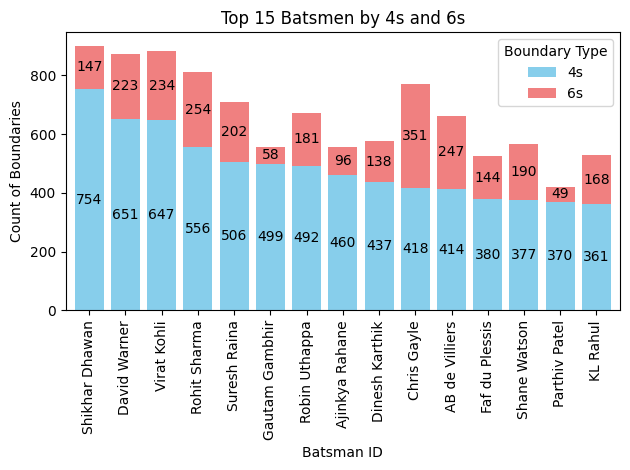

In [24]:
# Filter the DataFrame for 4s and 6s
boundaries_df = ipl_df[ipl_df['runs'].isin([4, 6])]

boundary_counts = boundaries_df.groupby(['batsman1_name', 'runs']).size().unstack(fill_value=0)

# Rename columns for clarity
boundary_counts.columns = ['4s', '6s']
top_15_boundaries = boundary_counts.sort_values(by=['4s', '6s'], ascending=False ).head(15)

plt.figure(figsize=(12, 8))
ax = top_15_boundaries.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], width=0.8)

plt.title('Top 15 Batsmen by 4s and 6s')
plt.xlabel('Batsman ID')
plt.ylabel('Count of Boundaries')
plt.legend(title="Boundary Type")

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()
# print MS dhoni match_id
#ipl_df.loc[ipl_df['batsman1_name'] == 'MS Dhoni', 'batsman1_id'].iat[0]


# 10. Highest scores - centuries

match_name  season    batsman1_name  runs
 RCB v PWI    2013      Chris Gayle   180
 RCB v KKR    2008 Brendon McCullum   169
 KKR v LSG    2022  Quinton de Kock   141
  MI v RCB    2015   AB de Villiers   138
KXIP v RCB    2020         KL Rahul   138
   GT v MI    2023     Shubman Gill   133
  RCB v GL    2016   AB de Villiers   132
  RR v SRH    2021      Jos Buttler   131
KXIP v RCB    2011   Adam Gilchrist   130
  DC v SRH    2018     Rishabh Pant   130


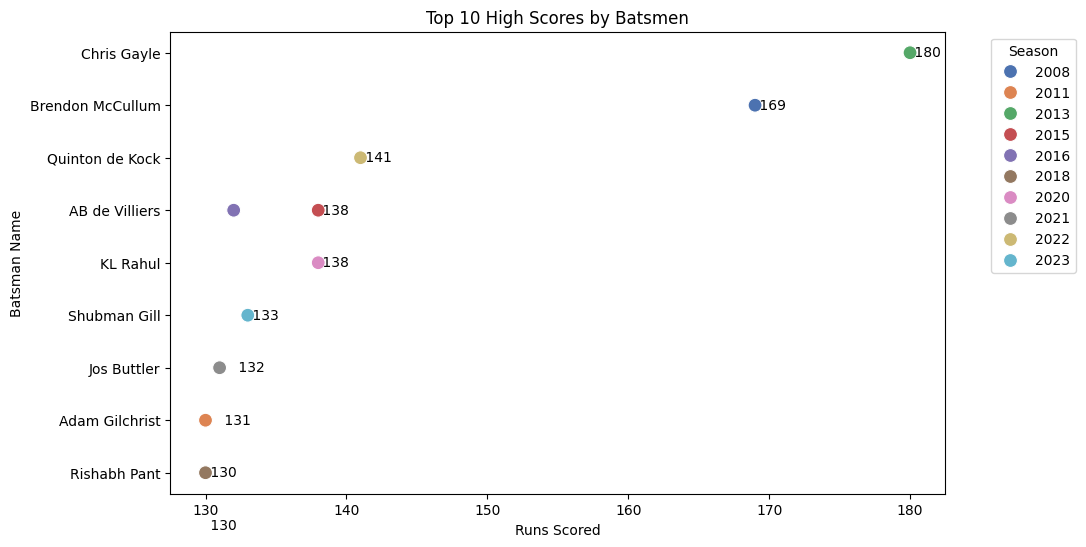

In [25]:
# Group by 'match_id' and 'batsman1_id', then sum 'batsman1_runs'
batsman_runs = ipl_df.groupby(['match_id', 'batsman1_id'])['runs'].sum().reset_index()

# Filter for sums greater than or equal to 100
centuries = batsman_runs[batsman_runs['runs'] >= 100]

# Merge with the original DataFrame to get 'batsman1_name'
result = pd.merge(
    centuries,
    ipl_df[['match_id', 'batsman1_id', 'batsman1_name', 'match_name', 'season']],
    on=['match_id', 'batsman1_id'],
    how='left'
).drop_duplicates().nlargest(10, 'runs')

# Display the result with relevant columns
print(result[['match_name', 'season', 'batsman1_name', 'runs']].to_string(index=False))

plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x='runs', y='batsman1_name', hue='season', data=result, palette='deep', s=100)
plt.title('Top 10 High Scores by Batsmen')
plt.xlabel('Runs Scored')
plt.ylabel('Batsman Name')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
for index, value in enumerate(result['runs']):
   plt.text(value, index, f" {value}", va='center')
plt.show()

# 11. Orange Cap Winner of the season`

In [26]:
# Calculate top 10 batsmen per season based on runs
top_batsmen_per_season = {}

# Loop through each season to calculate the top 10 batsmen by total runs
for season in ipl_df['season'].unique():
    season_df = ipl_df[ipl_df['season'] == season]  # Filter for the specific season
    batsman_runs = season_df.groupby('batsman1_id')['runs'].sum().reset_index()  # Sum runs per batsman
    top_10 = batsman_runs.nlargest(10, 'runs')  # Get top 10 by runs
    top_batsmen_per_season[season] = top_10  # Store in dictionary

# Map 'batsman1_id' to 'batsman1_name' and 'current_innings' within each season
mapped_top_batsmen = {}

for season, df in top_batsmen_per_season.items():
    # Merge with 'batsman1_name' and 'current_innings' columns from 'ipl_df' on 'batsman1_id'
    mapped_df = pd.merge(df, ipl_df[['batsman1_id', 'batsman1_name', 'current_innings']], on='batsman1_id', how='left')
    mapped_df = mapped_df.drop_duplicates(subset=['batsman1_id'])
    mapped_top_batsmen[season] = mapped_df  # Store mapped data

# Print top batsmen and Orange Cap winner for each season, including the team name
orange_cap_winners = []

for season, data in mapped_top_batsmen.items():
    print(f"Top 10 batsmen for season {season}:")
    # Identify the Orange Cap winner (batsman with max runs) and their team
    orange_cap = data.loc[data['runs'].idxmax()][['batsman1_name', 'current_innings']]
    orange_cap_name = orange_cap['batsman1_name']
    orange_cap_team = orange_cap['current_innings']
    print(f"Orange Cap winner of {season}: {orange_cap_name} (Team: {get_team_name(orange_cap_team)})")
    orange_cap_winners.append((orange_cap_name, season, orange_cap_team))  # Append winner info with team
    print("=" * 50)
    data['team_name'] = data['current_innings'].apply(get_team_name)
    print(f"\tBatter   Runs   \tTeam \n {data[['batsman1_name',  'runs',  'team_name']].to_string(index=False, header=False)}")  # Display top 10 batsmen with their team and runs
    print("-" * 80)

# Optional: Print all Orange Cap winners with their teams
# print(orange_cap_winners)


Top 10 batsmen for season 2023:
Orange Cap winner of 2023: Shubman Gill (Team: Gujarat Titans)
	Batter   Runs   	Team 
     Shubman Gill 923              Gujarat Titans
  Faf du Plessis 751 Royal Challengers Bangalore
    Devon Conway 700         Chennai Super Kings
     Virat Kohli 661 Royal Challengers Bangalore
Yashasvi Jaiswal 645            Rajasthan Royals
Suryakumar Yadav 618              Mumbai Indians
 Ruturaj Gaikwad 612         Chennai Super Kings
    David Warner 538              Delhi Capitals
     Rinku Singh 484       Kolkata Knight Riders
   Cameron Green 467              Mumbai Indians
--------------------------------------------------------------------------------
Top 10 batsmen for season 2022:
Orange Cap winner of 2022: Jos Buttler (Team: Rajasthan Royals)
	Batter   Runs   	Team 
     Jos Buttler 894            Rajasthan Royals
       KL Rahul 653        Lucknow Super Giants
Quinton de Kock 526        Lucknow Super Giants
  Hardik Pandya 511              Gujarat Tit

# 12. Top 10 batter of *season* 2022


In [27]:
season_2022 = ipl_df[ipl_df['season'] == 2022]

# Calculate total runs for each batsman in the 2022 season
top_batsmen_2022 = season_2022.groupby('batsman1_id')['runs'].sum().reset_index().sort_values(by='runs', ascending=False).head(10)

# Merge with the original DataFrame to get 'batsman1_name' and 'current_innings'
top_batsmen_2022 = pd.merge(top_batsmen_2022, ipl_df[['batsman1_id', 'batsman1_name', 'current_innings']], on='batsman1_id', how='left').drop_duplicates(subset='batsman1_id')
top_batsmen_2022['team_name'] = top_batsmen_2022['current_innings'].apply(get_team_name)

print(f"\tBatter  Runs  \t\t Team \n {top_batsmen_2022[['batsman1_name', 'runs', 'team_name']].to_string(index=False, header=False)}")

	Batter  Runs  		 Team 
     Jos Buttler 894            Rajasthan Royals
       KL Rahul 653        Lucknow Super Giants
Quinton de Kock 526        Lucknow Super Giants
  Hardik Pandya 511              Gujarat Titans
   Shubman Gill 505              Gujarat Titans
   David Miller 500              Gujarat Titans
 Faf du Plessis 493 Royal Challengers Bangalore
 Shikhar Dhawan 489                Punjab Kings
   Sanju Samson 478            Rajasthan Royals
   Deepak Hooda 471        Lucknow Super Giants


# 13. Runs Distribution across Powerplay, Middle Over and Death Overs

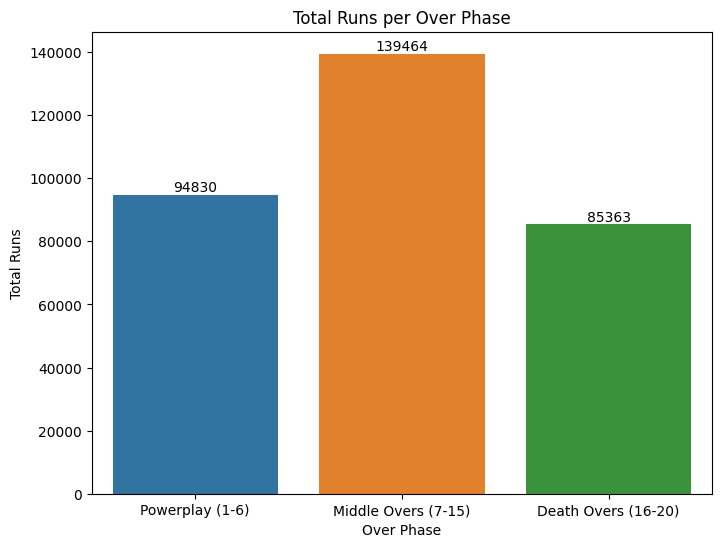

In [28]:
powerplay_runs = ipl_df[ipl_df['over'] <= 6]['runs'].sum()
middle_over_runs = ipl_df[(ipl_df['over'] > 6) & (ipl_df['over'] <= 15)]['runs'].sum()
death_over_runs = ipl_df[ipl_df['over'] > 15]['runs'].sum()

# Create a DataFrame for plotting
runs_data = pd.DataFrame({
    'Over Phase': ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Death Overs (16-20)'],
    'Total Runs': [powerplay_runs, middle_over_runs, death_over_runs]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Over Phase', y='Total Runs', data=runs_data, palette='tab10')
plt.title('Total Runs per Over Phase')
plt.xlabel('Over Phase')
plt.ylabel('Total Runs')

for i, v in enumerate(runs_data['Total Runs']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

plt.show()

In [29]:
season_runs = ipl_df.groupby('season')['runs'].mean().reset_index()
fig = px.line(season_runs, x='season', y='runs', title="Average Runs per Season")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Average Runs")
fig.show()

In [30]:
fig = px.scatter(ipl_df, x='runs', y='wicket_id', color='current_innings', title="Runs vs Wickets by Innings",
                 labels={'runs': 'Runs', 'wicket_id': 'Wickets'})
fig.show()

In [31]:
#write ipl_df to a file
ipl_df.to_csv('updated_all_season_details.csv.csv', index=False)
